# Welcome to Colab!

In [ ]:
!pip install tensorflow tensorflowjs gradio pillow numpy matplotlib


In [ ]:
import tensorflow as tf
import tensorflowjs as tfjs
import numpy as np
import json
import os
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files


In [ ]:
print("📂 Upload model.json, weights.bin and metadata.json")
uploaded = files.upload()
print("✅ Uploaded:", list(uploaded.keys()))


📂 Upload model.json, weights.bin and metadata.json


Saving metadata.json to metadata (1).json
Saving model.json to model (1).json
Saving weights.bin to weights (1).bin
✅ Uploaded: ['metadata (1).json', 'model (1).json', 'weights (1).bin']


In [ ]:
# Load metadata (labels)
with open("metadata.json", "r") as f:
    metadata = json.load(f)
labels = metadata.get("labels", metadata.get("class_labels", []))
print("🧾 Classes found:", labels)

# Load TensorFlow.js model
print("⏳ Loading model, please wait...")
model = tfjs.converters.load_keras_model("model.json")
print("✅ Model loaded successfully!")
model.summary()


🧾 Classes found: ['clean', 'dusty', 'Bird-drop', 'Electrical-damage', 'Physical-Damage', 'Snow-Covered']
⏳ Loading model, please wait...
✅ Model loaded successfully!
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 1280)              410208    
                                                                 
 sequential_3 (Sequential)   (None, 6)                 128700    
                                                                 
Total params: 538908 (2.06 MB)
Trainable params: 524828 (2.00 MB)
Non-trainable params: 14080 (55.00 KB)
_________________________________________________________________


🖼 Upload one solar panel image to test


Saving solar4.jfif to solar4.jfif
📷 Image selected: solar4.jfif
1/1 [==============================] - 1s 1s/step

🔍 Predicted: dusty
🎯 Accuracy: 66.62%


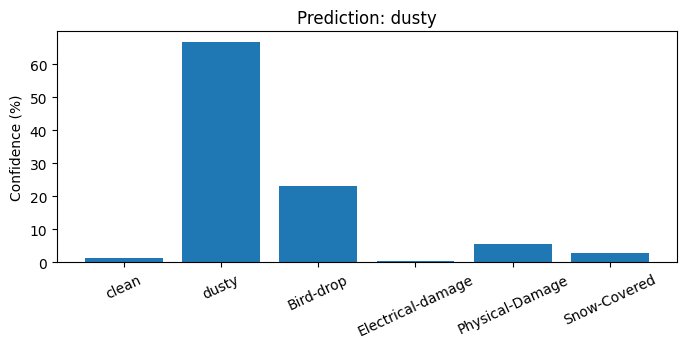

In [ ]:
print("🖼 Upload one solar panel image to test")
uploaded_img = files.upload()
img_path = list(uploaded_img.keys())[0]
print("📷 Image selected:", img_path)

# Preprocess image
img = Image.open(img_path).convert("RGB").resize((224, 224))
img_array = np.array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
preds = model.predict(img_array)[0]
pred_idx = np.argmax(preds)
pred_label = labels[pred_idx]
accuracy = preds[pred_idx] * 100

print(f"\n🔍 Predicted: {pred_label}")
print(f"🎯 Accuracy: {accuracy:.2f}%")

# Bar chart
plt.figure(figsize=(8, 3))
plt.bar(labels, preds * 100)
plt.ylabel("Confidence (%)")
plt.title(f"Prediction: {pred_label}")
plt.xticks(rotation=25)
plt.show()


In [7]:
import gradio as gr

def classify_image(img):
    img = img.convert("RGB").resize((224, 224))
    arr = np.array(img) / 255.0
    arr = np.expand_dims(arr, axis=0)
    preds = model.predict(arr)[0]
    idx = np.argmax(preds)
    result = f"Condition: {labels[idx]}"
    conf = f"Accuracy: {preds[idx]*100:.2f}%"
    return result, conf

ui = gr.Interface(
    fn=classify_image,
    inputs=gr.Image(type="pil", label="Upload Solar Panel Image"),
    outputs=[
        gr.Textbox(label="Prediction"),
        gr.Textbox(label="Accuracy")
    ],
    title="🔆 Solar Panel Classifier",
    description="Detect whether the panel is Clean, Dusty, Bird-drop, Electrical Damage, Physical Damage, or Snow-Covered."
)

ui.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b1fb94e8352f760d7d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
